In [1]:
import numpy as np
import matplotlib.pyplot as plt

import nn_tutorial.data as nd
import nn_tutorial.main as nm

# Process the MNIST Data

## 1. Load data from OpenML

In [2]:
X, y = nd.load_data()

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
def plot_idx(i):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(X[i, :].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {y[i]}")

### Plot a few examples

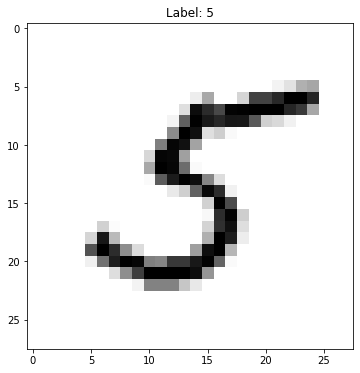

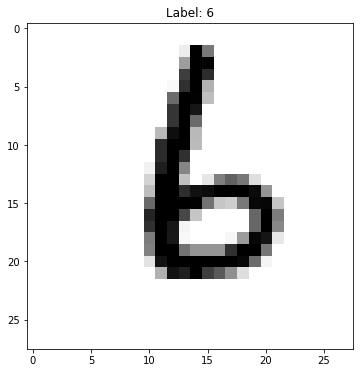

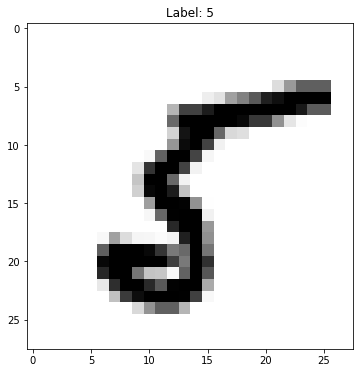

In [5]:
for i in np.random.randint(0, len(X), size=3):
    plot_idx(i)

## 2. Split data into (train, valid, test)

In [6]:
X_tr, X_val, X_te, y_tr, y_val, y_te = nd.split_data(X, y)

## 3. Calculate batch generators

In [7]:
num_epochs_tr = 1_000_000_000
batch_size = 128
bg_tr = nd.generate_batches(X_tr, y_tr, batch_size, num_epochs_tr)
bg_val = nd.generate_batches(X_val, y_val, batch_size, num_epochs_tr)
bg_te = nd.generate_batches(X_te, y_te, batch_size, 1)

# Train model

In [8]:
baseline_loss = -np.log(1/10.)
print(f"Loss for random guesser: {baseline_loss:0.5f}")

Loss for random guesser: 2.30259


In [9]:
hidden_size = 256
max_steps = 5_000
learning_rate = 1e-3
batch_generators = (bg_tr, bg_val, bg_te)
logging_interval = 500

clf = nm.train_ff_model(
    hidden_size=hidden_size,
    max_steps=max_steps,
    learning_rate=learning_rate,
    batch_generators=batch_generators,
    logging_interval=logging_interval
)

[step 1]: loss_tr: -0.10001    loss_val: -0.12315    acc_val: 0.35156
[step 500]: loss_tr: -0.89406    loss_val: -0.89469    acc_val: 0.91507
[step 1000]: loss_tr: -0.95701    loss_val: -0.94979    acc_val: 0.95517
[step 1500]: loss_tr: -0.96989    loss_val: -0.95745    acc_val: 0.96134
[step 2000]: loss_tr: -0.97633    loss_val: -0.96204    acc_val: 0.96497
[step 2500]: loss_tr: -0.98044    loss_val: -0.96290    acc_val: 0.96535
[step 3000]: loss_tr: -0.98289    loss_val: -0.96479    acc_val: 0.96658
[step 3500]: loss_tr: -0.98443    loss_val: -0.96590    acc_val: 0.96733
[step 4000]: loss_tr: -0.98578    loss_val: -0.96729    acc_val: 0.96896
[step 4500]: loss_tr: -0.98664    loss_val: -0.96739    acc_val: 0.96853
[step 5000]: loss_tr: -0.98722    loss_val: -0.96707    acc_val: 0.96829
